<a href="https://colab.research.google.com/github/ali-talebi/proposal_master/blob/main/Simulation_1403_07_27_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install fitter

In [2]:
import pandas as pd
from sklearn.metrics import r2_score
import numpy  as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import os
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier , ExtraTreesClassifier
# from fitter import Fitter, get_common_distributions, get_distributions
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense , Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


In [3]:
root_path = '/content/drive/MyDrive/Malek_Master/code/Total_Data_Simulation'

In [4]:
total_file_link = []
for i in os.listdir(root_path) :
  total_file_link.append(root_path+f'/{i}')

In [5]:
pd.read_csv(total_file_link[2])

,r/R,mean_delta_x,std_delta_x,mean_delta_y,std_delta_y,mean_delta_z,std_delta_z
0,0.2001,0.0434,0.0026,-0.0126,0.0013,-0.0162,0.0040
1,0.2499,-0.0157,0.0019,-0.0235,0.0031,-0.0061,0.0079
2,0.2998,-0.0418,0.0016,-0.0514,0.0053,-0.0781,0.0130
3,0.3498,-0.0550,0.0016,-0.0961,0.0091,-0.1268,0.0216
4,0.3913,-0.0646,0.0024,-0.1332,0.0133,-0.1839,0.0303
5,0.4496,-0.1020,0.0026,-0.1704,0.0173,-0.3251,0.0405
6,0.4997,-0.1255,0.0030,-0.2004,0.0207,-0.4803,0.0503
7,0.5387,-0.1535,0.0028,-0.2193,0.0230,-0.6758,0.0569
8,0.5996,-0.1964,0.0031,-0.2466,0.0273,-0.9893,0.0678
9,0.6498,-0.2235,0.0031,-0.2726,0.0316,-1.3829,0.0783


In [6]:
total_alpha_content = [ i / 1000 for i in range( 1 , 10  )  ]
total_flat_content  = [ i for i in range(1 , 5  ) ]
total_location      = list(range( 5 , 16))

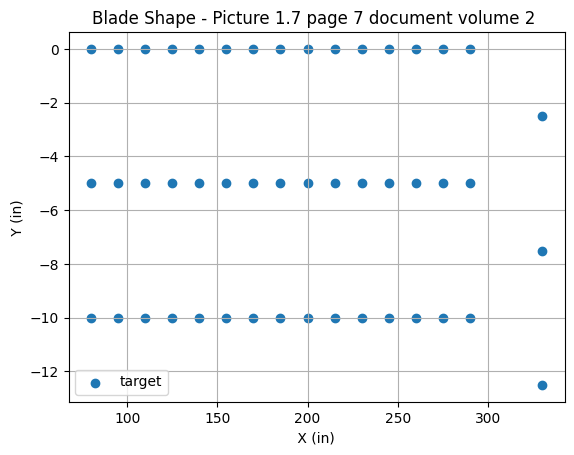

In [7]:
points = []
start_x = 65
start_y = [0 , -5 , -10.0 ]
for i in range(15) :
  start_x +=  15

  for j in range(3) :
    points.append([start_x , start_y[j] , 0 ] )

points.append([330 , -2.5 , 0 ])
points.append([330 , -7.5 , 0 ])
points.append([330 , -12.5 , 0 ])
total_points = np.array(points)
plt.scatter(total_points[ : ,  0 ] , total_points[ : , 1 ] , label = "target" )
plt.legend()
plt.title("Blade Shape - Picture 1.7 page 7 document volume 2 ")
plt.xlabel(" X (in) ")
plt.ylabel(" Y (in) ")
plt.grid()
plt.show()

In [8]:
total_simulation = {
    'bias_correlation' : [] ,
    'betha_0_correlation' : [] ,
    'betha_1_correlation' : [] ,
    'betha_2_correlation' : [] ,
    'betha_3_correlation' : [] ,
    'betha_4_correlation' : [] ,
    'betha_5_correlation' : [] ,
    'alpha' : [] ,
    'flap'  : [] ,
    'accuracy_nav' : [] ,

    'accuracy_random_forest' : [] ,
    'n_estimators_RF' : [] ,
    'max_features_RF' : [] ,
    'max_depth_RF'    : [] ,
    'criterion_RF'    : [] ,

    'accuracy_extra_classifier' : [] ,
    'accuracy_svc_' : [] ,
    'C_svc'         : [] ,
    'kernel_svc'    : [] ,
    'gamma_svc'     : [] ,
    'ann'           : []


}



MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH = {
    'mean_bias'    : [] ,
    'std_bias'     : [] ,
    'mean_betha_0' : [] ,
    'std_betha_0'  : [] ,
    'mean_betha_1' : [] ,
    'std_betha_1'  : [] ,
    'mean_betha_2' : [] ,
    'std_betha_2'  : [] ,
    'mean_betha_3' : [] ,
    'std_betha_3'  : [] ,
    'mean_betha_4' : [] ,
    'std_betha_4'  : [] ,
    'mean_betha_5' : [] ,
    'std_betha_5'  : [] ,
}



MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T = {
    'mean_bias'    : [] ,
    'std_bias'     : [] ,
    'mean_betha_0' : [] ,
    'std_betha_0'  : [] ,
    'mean_betha_1' : [] ,
    'std_betha_1'  : [] ,
    'mean_betha_2' : [] ,
    'std_betha_2'  : [] ,
    'mean_betha_3' : [] ,
    'std_betha_3'  : [] ,
    'mean_betha_4' : [] ,
    'std_betha_4'  : [] ,
    'mean_betha_5' : [] ,
    'std_betha_5'  : [] ,
}


MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT = {
    'mean_bias'    : [] ,
    'std_bias'     : [] ,
    'mean_betha_0' : [] ,
    'std_betha_0'  : [] ,
    'mean_betha_1' : [] ,
    'std_betha_1'  : [] ,
    'mean_betha_2' : [] ,
    'std_betha_2'  : [] ,
    'mean_betha_3' : [] ,
    'std_betha_3'  : [] ,
    'mean_betha_4' : [] ,
    'std_betha_4'  : [] ,
    'mean_betha_5' : [] ,
    'std_betha_5'  : [] ,
}



MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T = {
    'mean_bias'    : [] ,
    'std_bias'     : [] ,
    'mean_betha_0' : [] ,
    'std_betha_0'  : [] ,
    'mean_betha_1' : [] ,
    'std_betha_1'  : [] ,
    'mean_betha_2' : [] ,
    'std_betha_2'  : [] ,
    'mean_betha_3' : [] ,
    'std_betha_3'  : [] ,
    'mean_betha_4' : [] ,
    'std_betha_4'  : [] ,
    'mean_betha_5' : [] ,
    'std_betha_5'  : [] ,
}


iter_alpha : 0.001 | iter_flat : 1 
r2_score in Simulation Health for Each Blade :  0.9800413205244412
r2_score in Simulation Failt  void  for Each Blade :  0.9782986386937093
Error in Simulation Fault for Each Blade :  0.4596916381011924  --- r2_score Fault S ----  0.9730444814961562
Error in Simulation Fault T  for Each Blade :  0.4596916381011924  --- r2_score Fault T :  0.9895114706340755
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9858178592868745
r2_score in Simulation Failt  void  for Each Blade :  0.9750713967107791
Error in Simulation Fault for Each Blade :  -0.5644346672367488  --- r2_score Fault S ----  0.9863583369432926
Error in Simulation Fault T  for Each Blade :  -0.5644346672367488  --- r2_score Fault T :  0.9847214671653453
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.970511873198114
r2_score in Simulation Failt  void  for Each Blade :  0.9872356008604392
Error in Simulation Fault

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

              precision    recall  f1-score   support

         0.0       0.13      0.22      0.17        60
         1.0       0.11      0.17      0.13        72
         2.0       0.54      0.25      0.34       206
         3.0       0.13      0.22      0.17        58

    accuracy                           0.22       396
   macro avg       0.23      0.21      0.20       396
weighted avg       0.34      0.22      0.25       396

accuracy accuracy_random_forest  : 0.26515151515151514
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ...........................C=1, ga

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.2716 - loss: 1.4447 - val_acc: 0.2753 - val_loss: 1.3988
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.2631 - loss: 1.3940 - val_acc: 0.2803 - val_loss: 1.3914
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.2589 - loss: 1.3952 - val_acc: 0.2854 - val_loss: 1.3882
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.2381 - loss: 1.3909 - val_acc: 0.2879 - val_loss: 1.3852
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.2985 - loss: 1.3762 - val_acc: 0.3056 - val_loss: 1.3832
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.2709 - loss: 1.3910 - val_acc: 0.3005 - val_loss: 1.3827
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.2817 - loss: 1.3833 - val_acc: 0.3081 - val_loss: 1.3817
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.3012 - loss: 1.3592 - val_acc: 0.3030 - val_loss: 1.3809
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.3119 - loss:

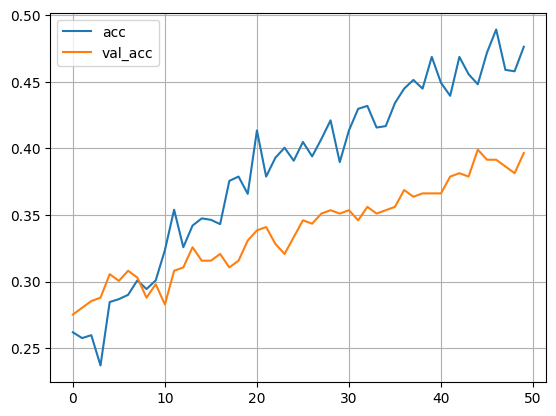

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.4260 - loss: 1.1373 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.001 | iter_flat : 2 
r2_score in Simulation Health for Each Blade :  0.9662356424729824
r2_score in Simulation Failt  void  for Each Blade :  0.9893601782354354
Error in Simulation Fault for Each Blade :  -1.5777618102641389  --- r2_score Fault S ----  0.9808691923949532
Error in Simulation Fault T  for Each Blade :  -1.5777618102641389  --- r2_score Fault T :  0.9697023585534956
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9686565737465636
r2_score in Simulation Failt  void  for Each Blade :  0.9807503027715916
Error in Simulation Fault for Each Blade :  0.9991770703825624  --- r2_score Fault S ----  0.9702402107012875
Error in Simulation Fault T  for Each Blade :  0.9991770703825624  --- r2_score Fault T :  0.9824081626131881
 ----- for each Blade Simulated ----- 
r2

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

              precision    recall  f1-score   support

         0.0       0.15      0.16      0.16        95
         1.0       0.43      0.25      0.32       182
         2.0       0.16      0.21      0.18        72
         3.0       0.14      0.30      0.19        47

    accuracy                           0.23       396
   macro avg       0.22      0.23      0.21       396
weighted avg       0.28      0.23      0.24       396

accuracy accuracy_random_forest  : 0.3005050505050505
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ...........................C=1, gam

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - acc: 0.2393 - loss: 1.4551 - val_acc: 0.2626 - val_loss: 1.3947
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.2301 - loss: 1.4065 - val_acc: 0.2399 - val_loss: 1.3903
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.2492 - loss: 1.3913 - val_acc: 0.2424 - val_loss: 1.3873
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.2217 - loss: 1.4062 - val_acc: 0.2778 - val_loss: 1.3862
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.2435 - loss: 1.3915 - val_acc: 0.2753 - val_loss: 1.3851
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.2721 - loss: 1.3790 - val_acc: 0.2879 - val_loss: 1.3849
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.2573 - loss: 1.3804 - val_acc: 0.2828 - val_loss: 1.3832
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.2690 - loss: 1.3806 - val_acc: 0.2803 - val_loss: 1.3813
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.2894 - loss: 1.3746 - v

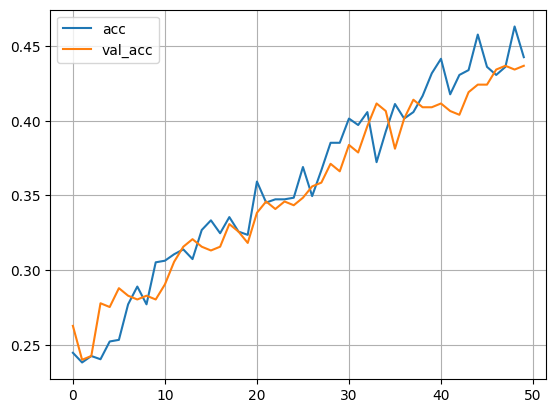

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.4182 - loss: 1.0661 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.001 | iter_flat : 3 
r2_score in Simulation Health for Each Blade :  0.98128619117791
r2_score in Simulation Failt  void  for Each Blade :  0.9870697335461287
Error in Simulation Fault for Each Blade :  0.7709647130494619  --- r2_score Fault S ----  0.9835729717835733
Error in Simulation Fault T  for Each Blade :  0.7709647130494619  --- r2_score Fault T :  0.9834546976431626
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9732869354826421
r2_score in Simulation Failt  void  for Each Blade :  0.9813844293700905
Error in Simulation Fault for Each Blade :  -2.330776042856261  --- r2_score Fault S ----  0.9628561699187266
Error in Simulation Fault T  for Each Blade :  -2.330776042856261  --- r2_score Fault T :  0.9831197077624457
 ----- for each Blade Simulated ----- 
r2_sco

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

              precision    recall  f1-score   support

         0.0       0.35      0.19      0.25       177
         1.0       0.10      0.27      0.15        41
         2.0       0.34      0.26      0.29       122
         3.0       0.13      0.23      0.17        56

    accuracy                           0.23       396
   macro avg       0.23      0.24      0.22       396
weighted avg       0.29      0.23      0.24       396

accuracy accuracy_random_forest  : 0.2777777777777778
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ...........................C=1, gam

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - acc: 0.2444 - loss: 1.4837 - val_acc: 0.2702 - val_loss: 1.4088
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.2416 - loss: 1.4202 - val_acc: 0.2551 - val_loss: 1.3877
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.2557 - loss: 1.3987 - val_acc: 0.2601 - val_loss: 1.3837
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.2618 - loss: 1.3853 - val_acc: 0.2727 - val_loss: 1.3829
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.2594 - loss: 1.3819 - val_acc: 0.3005 - val_loss: 1.3824
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.2677 - loss: 1.3759 - val_acc: 0.2980 - val_loss: 1.3822
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.2796 - loss: 1.3806 - val_acc: 0.2854 - val_loss: 1.3821
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.2948 - loss: 1.3719 - val_acc: 0.2904 - val_loss: 1.3819
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.2843 - loss: 1.3762 - v

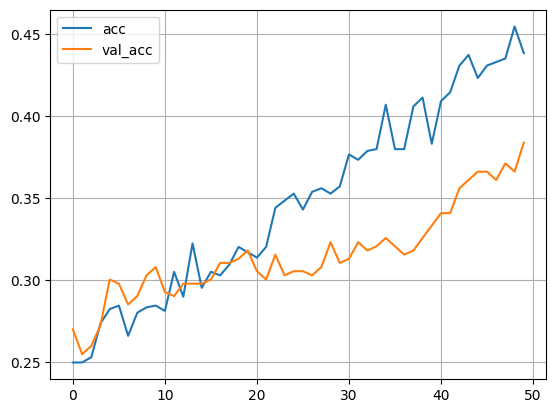

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.3969 - loss: 1.1992 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.001 | iter_flat : 4 
r2_score in Simulation Health for Each Blade :  0.9694463039097743
r2_score in Simulation Failt  void  for Each Blade :  0.9761979286398527
Error in Simulation Fault for Each Blade :  -0.06872548998423489  --- r2_score Fault S ----  0.9858993095750057
Error in Simulation Fault T  for Each Blade :  -0.06872548998423489  --- r2_score Fault T :  0.9674607766304593
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9775783750238539
r2_score in Simulation Failt  void  for Each Blade :  0.9831952174430614
Error in Simulation Fault for Each Blade :  -0.36572013090704036  --- r2_score Fault S ----  0.9831527822488173
Error in Simulation Fault T  for Each Blade :  -0.36572013090704036  --- r2_score Fault T :  0.9831045026553448
 ----- for each Blade Simulated ---

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

              precision    recall  f1-score   support

         0.0       0.11      0.19      0.14        57
         1.0       0.14      0.29      0.19        51
         2.0       0.43      0.21      0.28       197
         3.0       0.28      0.30      0.29        91

    accuracy                           0.24       396
   macro avg       0.24      0.25      0.23       396
weighted avg       0.31      0.24      0.25       396

accuracy accuracy_random_forest  : 0.33080808080808083
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ...........................C=1, ga

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - acc: 0.2456 - loss: 1.5366 - val_acc: 0.2323 - val_loss: 1.4331
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.2597 - loss: 1.4078 - val_acc: 0.2222 - val_loss: 1.3993
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.2979 - loss: 1.3979 - val_acc: 0.2677 - val_loss: 1.3945
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.2487 - loss: 1.4103 - val_acc: 0.2525 - val_loss: 1.3928
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.2794 - loss: 1.3782 - val_acc: 0.2677 - val_loss: 1.3919
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.2547 - loss: 1.3992 - val_acc: 0.2601 - val_loss: 1.3905
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3077 - loss: 1.3768 - val_acc: 0.2727 - val_loss: 1.3906
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.2765 - loss: 1.3922 - val_acc: 0.2803 - val_loss: 1.3900
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.2820 - loss: 1.3731 - v

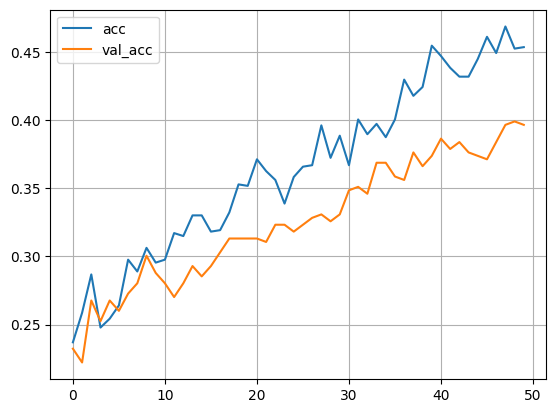

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.3934 - loss: 1.1442 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.002 | iter_flat : 1 
r2_score in Simulation Health for Each Blade :  0.9783672530748917
r2_score in Simulation Failt  void  for Each Blade :  0.984793322226
Error in Simulation Fault for Each Blade :  0.9090269132628559  --- r2_score Fault S ----  0.9819667847151131
Error in Simulation Fault T  for Each Blade :  0.9090269132628559  --- r2_score Fault T :  0.9890867376451716
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9850983687549102
r2_score in Simulation Failt  void  for Each Blade :  0.9787066931015584
Error in Simulation Fault for Each Blade :  -0.08887127674922501  --- r2_score Fault S ----  0.9802606216231776
Error in Simulation Fault T  for Each Blade :  -0.08887127674922501  --- r2_score Fault T :  0.9726702693988853
 ----- for each Blade Simulated ----- 
r2_s

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

              precision    recall  f1-score   support

         0.0       0.48      0.20      0.29       230
         1.0       0.14      0.24      0.18        62
         2.0       0.12      0.22      0.15        50
         3.0       0.17      0.31      0.22        54

    accuracy                           0.23       396
   macro avg       0.23      0.25      0.21       396
weighted avg       0.34      0.23      0.24       396

accuracy accuracy_random_forest  : 0.2702020202020202
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gam

KeyboardInterrupt: 

In [9]:
for iter_alpha in total_alpha_content :
  for iter_flat in total_flat_content :
    print(f"iter_alpha : {iter_alpha} | iter_flat : {iter_flat} ")
    params_health   = []
    params_fault    = []
    params_fault_t  = []
    params_health_t = []
    for iter_link in total_file_link :
      df_table_change     = pd.read_csv(iter_link)
      for locate in total_location:
        related_x = -1
        related_y = -1
        related_z = -1
        for iteration in range(10):
          alpha = 0
          term  = 0
          Flat_Add = 0
          noise_activate = ( (np.random.randn() + 1 ) / 100 )
          #print( f'Alpha : {iter_alpha} ' ,  f'Table Change : {iter_link}' , ' -- ' , f'Locate : {locate} ' , ' -- ' , f"Iter : {iteration}" , ' -- ' , '')
          select_location_combin_flap_term = 0
          select_locatiom_flap = 0

          total_health_iter  = []
          total_health_iter_t = []
          total_fault_iter   = []
          total_fault_t_iter = []
          new_data_simulated_ = []
          new_data_simulated_fault = []
          new_data_simulated_fault_t = []
          new_data_simulated_health_t = []



          for i in range(df_table_change.shape[0]):
            x_mean = df_table_change.iloc[i, 1]
            x_std  = df_table_change.iloc[i, 2]
            y_mean = df_table_change.iloc[i, 3]
            y_std  = df_table_change.iloc[i, 4]
            z_mean = df_table_change.iloc[i, 5]
            z_std  = df_table_change.iloc[i, 6]

            if i > locate :
              alpha = iter_alpha
              term  = -1 * ( alpha * abs( i - locate ) + noise_activate )
              Flat_Add  = iter_flat / 10

            for element in total_points[i * 3: (i + 1) * 3, :]:
              x_sample = element[0]
              y_sample = element[1]
              z_sample = element[2]
              rng = np.random.default_rng()
              x_added  = rng.normal(x_mean, x_std, size=1)
              x_added  = x_added.tolist()[0]
              x_sample += related_x * x_added

              y_added  = rng.normal(y_mean, y_std, size=1)
              y_added  = y_added.tolist()[0]
              y_sample += related_y * y_added

              z_added  = rng.normal(z_mean, z_std, size=1)
              z_base   = z_sample

              z_added_term  = z_added.tolist()[0] + term
              z_added       = z_added.tolist()[0]
              z_sample_new_term = z_base + related_z * z_added_term
              z_sample_new      = z_base + related_z * z_added
              z_flat  = z_sample_new_term
              z_flap_health = z_sample_new


              if select_location_combin_flap_term  == 0 :
                if np.random.randint(0 ,2 ) :
                  z_flat = z_sample_new_term + Flat_Add


              if select_locatiom_flap == 0 :
                if np.random.randint(0 ,2 ) :
                  z_flap_health = z_sample_new + Flat_Add







              new_data_simulated_.append([ x_sample, y_sample, z_sample_new  ])
              new_data_simulated_fault.append([ x_sample, y_sample, z_sample_new_term  ])
              new_data_simulated_fault_t.append([ x_sample, y_sample, z_flat  ])
              new_data_simulated_health_t.append([x_sample , y_sample , z_flap_health ])

              total_health_iter.append([ x_sample, y_sample, z_sample_new  ])
              total_fault_iter.append([ x_sample, y_sample, z_sample_new_term  ])
              total_fault_t_iter.append([ x_sample, y_sample, z_flat  ])
              total_health_iter_t.append([x_sample , y_sample , z_flap_health ])



          # fig = plt.figure(figsize=(20 , 10 ))

          # ax0 = fig.add_subplot(1 , 6 , 1 , projection='3d' )
          # ax1 = fig.add_subplot(1 , 6 , 2 , projection='3d' )
          # ax2 = fig.add_subplot(1 , 6 , 3 , projection='3d' )
          # ax3 = fig.add_subplot(1 , 6 , 4 , projection='3d' )
          # ax4 = fig.add_subplot(1 , 6 , 5 , projection='3d' )
          # ax5 = fig.add_subplot(1 , 6 , 6 , projection='3d' )

          # ax6 = fig.add_subplot(3 , 6 , 1 )
          # ax7 = fig.add_subplot(3 , 6 , 2 )
          # ax8 = fig.add_subplot(3 , 6 , 3 )

          # # ax3 = fig.add_subplot(1 , 6 , 4 )
          # # ax4 = fig.add_subplot(1 , 6 , 5 )
          # # ax5 = fig.add_subplot(1 , 6 , 6 )






          # total_health_iter = np.array(total_health_iter)
          # total_health_iter = np.array(total_health_iter)
          # total_fault_iter = np.array(total_fault_iter)
          # total_fault_t_iter = np.array(total_fault_t_iter)
          # total_health_iter_t = np.array(total_health_iter_t)
          # print(f"iter_alpha : {iter_alpha} , flap: {iter_flat} , locate : {locate} ,  iteration : {iteration} ")

          # ax0.scatter3D(total_health_iter[: , 0 ] , total_health_iter[: , 1 ] , total_health_iter[: , 2 ]  , label='health' , c = 'r'   )
          # ax0.scatter3D(total_fault_iter[: , 0 ] , total_fault_iter[: , 1 ] , total_fault_iter[: , 2 ]  , label='fault_alpha' ,  c = 'b' )
          # ax1.scatter3D(total_fault_iter[: , 0 ] , total_fault_iter[: , 1 ] , total_fault_iter[: , 2 ]  ,       label='fault_alpha' , c ='blue', s = 30     )
          # ax1.scatter3D(total_fault_t_iter[: , 0 ] , total_fault_t_iter[: , 1 ] , total_fault_t_iter[: , 2 ]  , label='fault_alpha + void ' , c='red' , s = 30 )
          # ax2.scatter3D(total_fault_t_iter[: , 0 ] , total_fault_t_iter[: , 1 ] , total_fault_t_iter[: , 2 ]  , label='fault_alpha + void ' , c='red'  , s = 30  )

          # ax3.scatter3D(total_health_iter[: , 0 ] , total_health_iter[: , 1 ]  , total_health_iter[: , 2 ]  ,       label='fault_void' , c ='blue'  )
          # ax3.scatter3D(total_fault_iter[: , 0 ] , total_fault_iter[: , 1]  , total_fault_iter[: , 2 ]  ,       label='fault_alpha' , c ='red' )
          # ax3.set_xlabel("axis x ")
          # ax3.set_ylabel("axis y ")

          # ax4.scatter3D(total_health_iter[: , 0 ] , total_health_iter[: , 1 ]  , total_health_iter[: , 2 ]  ,       label='health' , c ='blue',  )
          # ax4.scatter3D(total_fault_t_iter[: , 0 ] , total_health_iter[: , 1 ]  , total_fault_t_iter[: , 2 ]  , label='fault_alpha+ void ' , c='red' ,  )
          # ax4.set_xlabel("axis x")
          # ax4.set_ylabel("axis y")

          # ax5.scatter3D(total_health_iter[: , 0 ]  , total_health_iter[: , 1 ] , total_fault_iter[: , 2 ]  ,       label='health' , c ='blue' ,  )
          # ax5.scatter3D(total_health_iter_t[: , 0 ] , total_health_iter_t[: , 1] , total_fault_t_iter[: , 2 ]  , label='fault_void' , c='red' ,  )
          # ax5.set_xlabel("axis x ")
          # ax5.set_ylabel("axis y ")

          # ax6.scatter(total_health_iter[: , 0 ]  , total_health_iter[: , 2 ]  , label='health' , c='b' , s = 40 ,  )
          # ax6.scatter(total_health_iter_t[: , 0 ]  , total_fault_iter[: , 2 ]  , label='fault_void' , c='r' , s = 30 ,  )
          # ax6.set_xlabel("axis  x ")
          # ax6.set_ylabel("axis  y ")
          # ax6.set_title(f"alpha : {iter_alpha} , void : {iter_flat/10} , location : {locate}")

          # ax7.scatter(total_health_iter[: , 0 ]  , total_health_iter[: , 2 ]  , label='health' , c='b' , s = 40 , alpha = 0.5 )
          # ax7.scatter(total_fault_t_iter[: , 0 ]  , total_fault_t_iter[: , 2 ]  , label='fault_alpha + void ' , c='r' , s = 30  )
          # ax7.set_xlabel("axis  x ")
          # ax7.set_ylabel("axis  y ")

          # ax8.scatter(total_fault_iter[: , 0 ]  , total_fault_iter[: , 2 ]  , label='fault_alpha' , c='b' , )
          # ax8.scatter(total_fault_t_iter[: , 0 ]  , total_fault_t_iter[: , 2 ]  , label='Fault_alpha + void' , c='r')
          # ax8.set_xlabel("axis  x ")
          # ax8.set_ylabel("axis  y ")


          # ax0.legend()
          # ax0.grid()
          # ax0
          # ax1.legend()
          # ax1.grid()
          # ax2.legend()
          # ax2.grid()
          # ax3.legend()
          # ax3.grid()

          # ax4.legend()
          # ax4.grid()
          # ax5.legend()
          # ax5.grid()


          # ax6.legend()
          # ax6.grid()

          # ax7.legend()
          # ax7.grid()
          # ax8.legend()
          # ax8.grid()

          # plt.show()




          new_data_simulated_         = np.array(new_data_simulated_)
          new_data_simulated_fault    = np.array(new_data_simulated_fault)
          new_data_simulated_fault_t  = np.array(new_data_simulated_fault_t)
          new_data_simulated_health_t = np.array(new_data_simulated_health_t)


          #fig = plt.figure(figsize=(30, 10))
          df_health = pd.DataFrame()
          df_health['X_'] = new_data_simulated_[:, 0]
          df_health['Y_'] = new_data_simulated_[:, 1]
          df_health['Z_'] = new_data_simulated_[:, 2]

          poly = PolynomialFeatures(degree=2)
          x_poly = poly.fit_transform(df_health[['X_', 'Y_']])
          scaler = StandardScaler()
          df_stander = pd.DataFrame(scaler.fit_transform(x_poly), columns=['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2', ])
          df_stander['Z_'] = df_health['Z_']
          x_train, x_test, z_train, z_test = train_test_split(df_stander[['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2']],
                                                                          df_stander["Z_"])
          model = LinearRegression()
          model.fit(x_train, z_train)
          z_predict = model.predict(x_test)
          intercept_0 = model.intercept_
          coef1 = model.coef_[0]
          coef2 = model.coef_[1]
          coef3 = model.coef_[2]
          coef4 = model.coef_[3]
          coef5 = model.coef_[4]
          coef6 = model.coef_[5]

          total_new_generate = []
          total_error_health = 0
          for i in range(len(df_health['X_'])):
            new_value = intercept_0 + coef1 * df_stander.iloc[i, 0] + coef2 * df_stander.iloc[i, 1] + coef3 * df_stander.iloc[i, 2] + coef4 * df_stander.iloc[i, 3] + coef5 * df_stander.iloc[i, 4]
            + coef6 * df_stander.iloc[i, 5]
            total_new_generate.append(new_value)
            error = df_stander.iloc[i, -1] - new_value
            total_error_health += error

          print("r2_score in Simulation Health for Each Blade : " , r2_score(z_predict, z_test) )

          #class health == 0
          params_health.append([intercept_0, coef1, coef2, coef3, coef4, coef5, coef6, r2_score(z_predict, z_test),locate , 0 , iter_alpha ,  iter_flat  ])
          total_change = [1, 1]
          related_x *= total_change[np.random.randint(0, 2)]
          related_y *= total_change[np.random.randint(0, 2)]
          related_z *= total_change[np.random.randint(0, 2)]

          # ---- setup for class health t ----

          df_health_t = pd.DataFrame()
          df_health_t['X_'] = new_data_simulated_health_t[:, 0]
          df_health_t['Y_'] = new_data_simulated_health_t[:, 1]
          df_health_t['Z_'] = new_data_simulated_health_t[:, 2]

          poly_health_t = PolynomialFeatures(degree=2)
          x_poly_health_t = poly_health_t.fit_transform(df_health_t[['X_', 'Y_']])
          scaler_health_t = StandardScaler()
          df_stander_health_t = pd.DataFrame(scaler_health_t.fit_transform(x_poly_health_t), columns=['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2', ])
          df_stander_health_t['Z_'] = df_health_t['Z_']
          x_train, x_test, z_train, z_test = train_test_split(df_stander_health_t[['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2']],
                                                                          df_stander["Z_"])
          model_health_t = LinearRegression()
          model_health_t.fit(x_train, z_train)
          z_predict_health_t = model_health_t.predict(x_test)
          intercept_0 = model_health_t.intercept_
          coef1 = model_health_t.coef_[0]
          coef2 = model_health_t.coef_[1]
          coef3 = model_health_t.coef_[2]
          coef4 = model_health_t.coef_[3]
          coef5 = model_health_t.coef_[4]
          coef6 = model_health_t.coef_[5]

          total_new_generate_health_t = []
          total_error_health_t = 0
          for i in range(len(df_health['X_'])):
            new_value = intercept_0 + coef1 * df_stander_health_t.iloc[i, 0] + coef2 * df_stander_health_t.iloc[i, 1] + coef3 * df_stander_health_t.iloc[i, 2] + coef4 * df_stander_health_t.iloc[i, 3] + coef5 * df_stander_health_t.iloc[i, 4]
            + coef6 * df_stander_health_t.iloc[i, 5]
            total_new_generate_health_t.append(new_value)
            error = df_stander_health_t.iloc[i, -1] - new_value
            total_error_health_t += error

          print("r2_score in Simulation Failt  void  for Each Blade : " , r2_score(z_predict_health_t, z_test) )

          #class health == 0
          params_health_t.append([intercept_0, coef1, coef2, coef3, coef4, coef5, coef6, r2_score(z_predict_health_t, z_test),locate , 1 , iter_alpha ,  iter_flat  ])
          total_change = [1, 1]
          related_x *= total_change[np.random.randint(0, 2)]
          related_y *= total_change[np.random.randint(0, 2)]
          related_z *= total_change[np.random.randint(0, 2)]





          # ---- setup for class Fault ----
          df_fault = pd.DataFrame()
          df_fault['X_'] = new_data_simulated_fault[:, 0]
          df_fault['Y_'] = new_data_simulated_fault[:, 1]
          df_fault['Z_'] = new_data_simulated_fault[:, 2]




          poly_fault = PolynomialFeatures(degree=2)
          x_poly_fault = poly_fault.fit_transform(df_fault[['X_', 'Y_']])
          scaler_fault = StandardScaler()
          df_stander_fault = pd.DataFrame(scaler_fault.fit_transform(x_poly_fault), columns=['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2', ])
          df_stander_fault['Z_'] = df_fault['Z_']
          x_train_fault , x_test_fault , z_train_fault , z_test_fault = train_test_split(df_stander_fault[['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2']], df_stander_fault["Z_"])
          model_fault = LinearRegression()
          model_fault.fit(x_train_fault, z_train_fault)
          z_predict_fault = model_fault.predict(x_test_fault)
          intercept_0 = model_fault.intercept_
          coef1 = model_fault.coef_[0]
          coef2 = model_fault.coef_[1]
          coef3 = model_fault.coef_[2]
          coef4 = model_fault.coef_[3]
          coef5 = model_fault.coef_[4]
          coef6 = model_fault.coef_[5]
          total_new_generate_fault = []
          total_error_fault = 0
          for i in range(len(df_fault['X_'])):
            new_value = intercept_0 + coef1 * df_stander_fault.iloc[i, 0] + coef2 * df_stander_fault.iloc[i, 1] + coef3 *  df_stander_fault.iloc[i, 2] + coef4 * df_stander_fault.iloc[i, 3] + coef5 * df_stander_fault.iloc[i, 4]  + coef6 * df_stander_fault.iloc[i, 5]
            total_new_generate_fault.append(new_value)
            error_Fault = df_stander_fault.iloc[i, -1] - new_value
            total_error_fault += error_Fault

          print("Error in Simulation Fault for Each Blade : " , total_error_fault  , " --- r2_score Fault S ---- " ,  r2_score(z_predict_fault, z_test_fault))


          params_fault.append([intercept_0, coef1, coef2, coef3, coef4, coef5, coef6, r2_score(z_predict_fault, z_test_fault),locate ,  2 , iter_alpha ,  iter_flat ])
          total_change = [1, 1]
          related_x *= total_change[np.random.randint(0, 2)]
          related_y *= total_change[np.random.randint(0, 2)]
          related_z *= total_change[np.random.randint(0, 2)]

          # ---- setup for class Fault T ----

          df_fault_t = pd.DataFrame()
          df_fault_t['X_'] = new_data_simulated_fault_t[:, 0]
          df_fault_t['Y_'] = new_data_simulated_fault_t[:, 1]
          df_fault_t['Z_'] = new_data_simulated_fault_t[:, 2]




          poly_fault_t = PolynomialFeatures(degree=2)
          x_poly_fault_t = poly_fault_t.fit_transform(df_fault_t[['X_', 'Y_']])
          scaler_fault_t = StandardScaler()
          df_stander_fault_t = pd.DataFrame(scaler_fault_t.fit_transform(x_poly_fault_t), columns=['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2', ])
          df_stander_fault_t['Z_'] = df_fault_t['Z_']
          x_train_fault_t , x_test_fault_t , z_train_fault_t , z_test_fault_t = train_test_split(df_stander_fault_t[['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2']], df_stander_fault["Z_"])
          model_fault_t = LinearRegression()
          model_fault_t.fit(x_train_fault_t, z_train_fault_t)
          z_predict_fault_t = model_fault_t.predict(x_test_fault_t)
          intercept_0 = model_fault_t.intercept_
          coef1 = model_fault_t.coef_[0]
          coef2 = model_fault_t.coef_[1]
          coef3 = model_fault_t.coef_[2]
          coef4 = model_fault_t.coef_[3]
          coef5 = model_fault_t.coef_[4]
          coef6 = model_fault_t.coef_[5]
          total_new_generate_fault_t = []
          total_error_fault_t = 0
          for i in range(len(df_fault['X_'])):
            new_value = intercept_0 + coef1 * df_stander_fault_t.iloc[i, 0] + coef2 * df_stander_fault_t.iloc[i, 1] + coef3 *  df_stander_fault_t.iloc[i, 2] + coef4 * df_stander_fault_t.iloc[i, 3] + coef5 * df_stander_fault_t.iloc[i, 4]  + coef6 * df_stander_fault_t.iloc[i, 5]
            total_new_generate_fault_t.append(new_value)
            error_Fault = df_stander_fault_t.iloc[i, -1] - new_value
            total_error_fault_t += error_Fault

          print("Error in Simulation Fault T  for Each Blade : " , total_error_fault , " --- r2_score Fault T : " ,  r2_score(z_predict_fault_t, z_test_fault_t)   )



          params_fault_t.append([intercept_0, coef1, coef2, coef3, coef4, coef5, coef6, r2_score(z_predict_fault_t, z_test_fault_t),locate ,  3 , iter_alpha ,  iter_flat ])
          total_change = [1, 1]
          related_x *= total_change[np.random.randint(0, 2)]
          related_y *= total_change[np.random.randint(0, 2)]
          related_z *= total_change[np.random.randint(0, 2)]

          print(" ----- for each Blade Simulated ----- " )



#----
    params_health = np.array(params_health)
    df_params = pd.DataFrame({'bias':params_health[: , 0 ] , 'betha_0':params_health[ : , 1 ] , 'betha_1':params_health[ : , 2 ] , 'betha_2':params_health[ : , 3 ] ,  'betha_3':params_health[ : , 4 ] , 'betha_4':params_health[ : , 5 ] , 'betha_5':params_health[ : , 6 ] , 'R2' : params_health[ : , 7 ]  ,
                          'locate' : params_health[: , 8 ].astype(int)   , 'class' :params_health[: , 9 ] ,
                              'alpha' :params_health[: , 10 ] , 'flap' : params_health[: , 11 ] } )





    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_bias'].append(df_params['bias'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_bias'].append(df_params['bias'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_betha_0'].append(df_params['betha_0'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_betha_0'].append(df_params['betha_0'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_betha_1'].append(df_params['betha_1'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_betha_1'].append(df_params['betha_1'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_betha_2'].append(df_params['betha_2'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_betha_2'].append(df_params['betha_2'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_betha_3'].append(df_params['betha_3'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_betha_3'].append(df_params['betha_3'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_betha_4'].append(df_params['betha_4'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_betha_4'].append(df_params['betha_4'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_betha_5'].append(df_params['betha_5'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_betha_5'].append(df_params['betha_5'].std())

    # -------------------------------------------------------------------------------------------

    params_health_t = np.array(params_health_t)
    df_params_health_t = pd.DataFrame({'bias':params_health_t[: , 0 ] , 'betha_0':params_health_t[ : , 1 ] , 'betha_1':params_health_t[ : , 2 ] , 'betha_2':params_health_t[ : , 3 ] ,  'betha_3':params_health_t[ : , 4 ] , 'betha_4':params_health_t[ : , 5 ] , 'betha_5':params_health[ : , 6 ] , 'R2' : params_health_t[ : , 7 ]  ,
                          'locate' : params_health_t[: , 8 ].astype(int)   , 'class' :params_health_t[: , 9 ] ,
                              'alpha' :params_health_t[: , 10 ] , 'flap' : params_health_t[: , 11 ] } )





    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['mean_bias'].append(df_params_health_t['bias'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['std_bias'].append(df_params_health_t['bias'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['mean_betha_0'].append(df_params_health_t['betha_0'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['std_betha_0'].append(df_params_health_t['betha_0'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['mean_betha_1'].append(df_params_health_t['betha_1'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['std_betha_1'].append(df_params_health_t['betha_1'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['mean_betha_2'].append(df_params_health_t['betha_2'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['std_betha_2'].append(df_params_health_t['betha_2'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['mean_betha_3'].append(df_params_health_t['betha_3'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['std_betha_3'].append(df_params_health_t['betha_3'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['mean_betha_4'].append(df_params_health_t['betha_4'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['std_betha_4'].append(df_params_health_t['betha_4'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['mean_betha_5'].append(df_params_health_t['betha_5'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['std_betha_5'].append(df_params_health_t['betha_5'].std())





    # --------------------------------------------------------------------------------------------
    params_fault = np.array(params_fault)
    df_params_fault = pd.DataFrame({'bias':params_fault[: , 0 ] , 'betha_0':params_fault[ : , 1 ] , 'betha_1':params_fault[ : , 2 ] , 'betha_2':params_fault[ : , 3 ] ,  'betha_3':params_fault[ : , 4 ] , 'betha_4':params_fault[ : , 5 ] , 'betha_5':params_fault[ : , 6 ] , 'R2' : params_fault[ : , 7 ]  ,
                            'locate' : params_fault[: , 8 ].astype(int) ,
                                    'class' :params_fault[: , 9 ]  ,
                                    'alpha' :params_fault[: , 10 ] , 'flap' : params_fault[: , 11 ] }   )


    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_bias'].append(df_params_fault['bias'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_bias'].append(df_params_fault['bias'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_betha_0'].append(df_params_fault['betha_0'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_betha_0'].append(df_params_fault['betha_0'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_betha_1'].append(df_params_fault['betha_1'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_betha_1'].append(df_params_fault['betha_1'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_betha_2'].append(df_params_fault['betha_2'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_betha_2'].append(df_params_fault['betha_2'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_betha_3'].append(df_params_fault['betha_3'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_betha_3'].append(df_params_fault['betha_3'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_betha_4'].append(df_params_fault['betha_4'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_betha_4'].append(df_params_fault['betha_4'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_betha_5'].append(df_params_fault['betha_5'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_betha_5'].append(df_params_fault['betha_5'].std())




    params_fault_t = np.array(params_fault_t)
    df_params_fault_t = pd.DataFrame({'bias':params_fault_t[: , 0 ] , 'betha_0':params_fault_t[ : , 1 ] , 'betha_1':params_fault_t[ : , 2 ] , 'betha_2':params_fault_t[ : , 3 ] ,  'betha_3':params_fault_t[ : , 4 ] , 'betha_4':params_fault_t[ : , 5 ] , 'betha_5':params_fault_t[ : , 6 ] , 'R2' : params_fault_t[ : , 7 ]  ,
                            'locate' : params_fault_t[: , 8 ].astype(int) ,
                                    'class' :params_fault_t[: , 9 ]  ,
                                    'alpha' :params_fault_t[: , 10 ] , 'flap' : params_fault_t[: , 11 ] }  )


    # check_columns = ['bias' , 'betha_0' , 'betha_1' , 'betha_2' , 'betha_3' , 'betha_4' , 'betha_5' ]
    # for element in check_columns :
    #   fig = plt.figure(figsize = (10 , 10 ))
    #   ax0 = fig.add_subplot(111 )
    #   sns.kdeplot( df_params[element]  , label=f'mean_health - {element} coef'  , shade=True )
    #   sns.kdeplot(df_params_fault[element] , label=f'mean_fault_alpha - {element} coef '  , shade=True  )
    #   sns.kdeplot(df_params_fault_t[element] , label=f'mean_fault-alpha + void- {element} coef ' ,  shade=True  )
    #   sns.kdeplot(df_params_health_t[element] , label=f'mean_fault-void- {element} coef ' ,  shade=True  )
    #   plt.legend()
    #   plt.title(f"For This  alpha : {iter_alpha} and void : {iter_flat / 10 }  ")
    #   plt.grid()
    #   plt.show()



    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_bias'].append(df_params_fault_t['bias'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_bias'].append(df_params_fault_t['bias'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_betha_0'].append(df_params_fault_t['betha_0'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_betha_0'].append(df_params_fault_t['betha_0'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_betha_1'].append(df_params_fault_t['betha_1'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_betha_1'].append(df_params_fault_t['betha_1'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_betha_2'].append(df_params_fault_t['betha_2'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_betha_2'].append(df_params_fault_t['betha_2'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_betha_3'].append(df_params_fault_t['betha_3'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_betha_3'].append(df_params_fault_t['betha_3'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_betha_4'].append(df_params_fault_t['betha_4'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_betha_4'].append(df_params_fault_t['betha_4'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_betha_5'].append(df_params_fault_t['betha_5'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_betha_5'].append(df_params_fault_t['betha_5'].std())



    concat_2_df_health_fault = pd.concat([df_params , df_params_health_t , df_params_fault , df_params_fault_t ] , axis = 0 )
    df_corr = concat_2_df_health_fault.corr()







  # --- learning
    #plt.figure(figsize= (10 , 10 ) )
    #ax = sns.heatmap(df_corr , annot=True )
    #print(df_corr)
    #plt.show()
    total_simulation['alpha'].append(iter_alpha)
    total_simulation['flap'].append(iter_flat)
    total_simulation['bias_correlation'].append(df_corr['class']['bias'])
    total_simulation['betha_0_correlation'].append(df_corr['class']['betha_0'])
    total_simulation['betha_1_correlation'].append(df_corr['class']['betha_1'])
    total_simulation['betha_2_correlation'].append(df_corr['class']['betha_2'])
    total_simulation['betha_3_correlation'].append(df_corr['class']['betha_3'])
    total_simulation['betha_4_correlation'].append(df_corr['class']['betha_4'])
    total_simulation['betha_5_correlation'].append(df_corr['class']['betha_5'])



    #df2_health  =  concat_2_df_health_fault[concat_2_df_health_fault['class'] == 0 ]
    #df2_fault   =  concat_2_df_health_fault[concat_2_df_health_fault['class'] == 1 ]
    #df2_fault_t =  concat_2_df_health_fault[concat_2_df_health_fault['class'] == 2 ]


    stander_u = StandardScaler()
    stand_df_with_out = concat_2_df_health_fault.drop(['class' , 'alpha' , 'flap'] , axis = 1 )
    stand_df_with_out = pd.DataFrame(stander_u.fit_transform(stand_df_with_out )  , columns = stand_df_with_out.columns )
    x_u_train , x_u_test , y_u_train , y_u_test = train_test_split(stand_df_with_out , concat_2_df_health_fault['class'] , random_state=42 , test_size=0.3  )
    obj_gaunb = GaussianNB()
    obj_gaunb.fit(x_u_train , y_u_train )
    pre_nb = obj_gaunb.predict(x_u_test)
    accuray_nav = accuracy_score(pre_nb ,y_u_test )
    print(classification_report(pre_nb ,y_u_test ) )
    # plt.figure(figsize = (5 ,5 ))
    # cm = confusion_matrix(pre_nb ,y_u_test , normalize='pred')
    # disp = ConfusionMatrixDisplay(confusion_matrix=cm )
    # disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
    # plt.title("Nave Bays Confusion Matrix ")
    # plt.show()
    print(f"accuracy Nave Bays : {accuray_nav}")
    total_simulation['accuracy_nav'].append(accuray_nav)


    # ---------------------------------------------------------
    rfc=RandomForestClassifier(random_state=42)
    param_grid = {
        'n_estimators': [200, 500],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth' : [4,5,6,7,8],
        'criterion' :['gini', 'entropy']
    }

    CV_rfc = GridSearchCV(estimator=rfc, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)
    CV_rfc.fit(x_u_train, y_u_train)
    best_params_for_random_forest = CV_rfc.best_params_
    pre_random = CV_rfc.predict(x_u_test)
    accuracy_random_forest = accuracy_score(pre_random ,y_u_test )
    print(classification_report(pre_nb ,y_u_test ) )
    # plt.figure(figsize = (5 , 5 ))
    # cm = confusion_matrix(pre_random ,y_u_test , normalize='pred')
    # disp = ConfusionMatrixDisplay(confusion_matrix=cm )
    # disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
    # plt.title("Random Forest Confusion Matrix ")
    # plt.show()
    print(f"accuracy accuracy_random_forest  : {accuracy_random_forest}")
    total_simulation['accuracy_random_forest'].append(accuracy_random_forest)
    total_simulation['n_estimators_RF'].append(best_params_for_random_forest['n_estimators'])
    total_simulation['max_features_RF'].append(best_params_for_random_forest['max_features'])
    total_simulation['max_depth_RF'].append(best_params_for_random_forest['max_depth'])
    total_simulation['criterion_RF'].append(best_params_for_random_forest['criterion'])


    # ---------------------------------------------------------
    extra_classifier = ExtraTreesClassifier()
    extra_classifier.fit(x_u_train , y_u_train )
    predict_extra = extra_classifier.predict(x_u_test)
    total_simulation['accuracy_extra_classifier'].append(accuracy_score(predict_extra ,y_u_test ) )

    # --------------------------------------------------------
    param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
    grid = GridSearchCV(SVC(),param_grid,refit = True, verbose=2)
    grid.fit(x_u_train, y_u_train)
    best_params_for_svc = grid.best_params_
    model_svc = SVC()
    svc_predict = grid.predict(x_u_test)
    accuracy_svc = accuracy_score(svc_predict ,y_u_test )
    # plt.figure(figsize = (5 , 5 ))
    # cm = confusion_matrix(svc_predict ,y_u_test, normalize='pred')
    # disp = ConfusionMatrixDisplay(confusion_matrix=cm )
    # disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
    # plt.title("SVM(SVC) Confusion Matrix ")
    # plt.show()
    total_simulation['accuracy_svc_'].append(accuracy_svc)
    total_simulation['C_svc'].append(best_params_for_svc['C'])
    total_simulation['kernel_svc'].append(best_params_for_svc['kernel'])
    total_simulation['gamma_svc'].append(best_params_for_svc['gamma'])


    # ----------------------------------------------------------







    new_y_u_train_cat = to_categorical(y_u_train , 4 )
    new_y_u_test_cat  = to_categorical(y_u_test , 4 )

    model_learning = Sequential([
        Dense(32 , activation='relu' , input_shape = x_u_train.shape[1 : ] ) ,
        Dropout(0.2) ,
        Dense(10 , activation= 'relu' ) ,
        Dense(4 , activation='softmax' ) ,
    ])

    model_learning.compile('adam' , loss = 'categorical_crossentropy' , metrics = ['acc' ] )
    model_learning_info = model_learning.fit(x_u_train , new_y_u_train_cat , epochs = 50 , validation_data = [x_u_test , new_y_u_test_cat ] )
    plt.plot(range(50) , model_learning_info.history['acc'] , label='acc' )
    plt.plot(range(50) , model_learning_info.history['val_acc'] , label='val_acc' )
    plt.legend()
    plt.grid()
    plt.show()

    total_simulation['ann'].append(model_learning.evaluate(x_u_test , new_y_u_test_cat)[1])

    print(" ----------------- //////// End This Iter alpha and Flap //////// ------------------------- ")












In [9]:

df_health_mean_and_std  = pd.DataFrame(MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH)
df_health_t_mean_and_std  = pd.DataFrame(MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T)
df_fault_t_mean_and_std = pd.DataFrame(MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T)
df_fault_mean_and_std   = pd.DataFrame(MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT)



In [10]:
check_columns = ['mean_bias' , 'mean_betha_0' , 'mean_betha_1' , 'mean_betha_2' , 'mean_betha_3' , 'mean_betha_4' , 'mean_betha_5' ]


mean fault t :  1.7549069499627745  - mean fault :  1.754844898828764  - mean health :  1.7454416097639662


<ipython-input-11-96ead9510f57>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
<ipython-input-11-96ead9510f57>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault_alpha '  , shade=True  )
<ipython-input-11-96ead9510f57>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_health_mean_and_std[element] , label=f'mean_helth - {element} ' ,  shade=True  )
<ipython-input-11-96ead9510f57>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This 

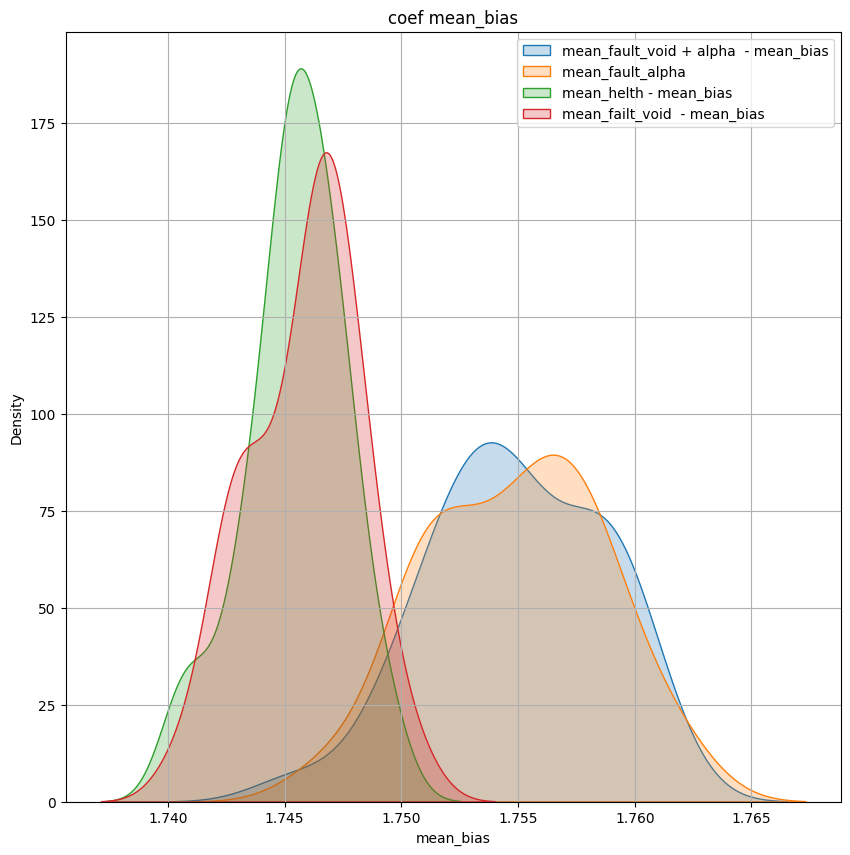

<ipython-input-11-96ead9510f57>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
<ipython-input-11-96ead9510f57>:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
<ipython-input-11-96ead9510f57>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault_alpha '  , shade=True  )
<ipython-input-11-96ead9510f57>:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning

mean fault t :  0.0  - mean fault :  0.0  - mean health :  0.0


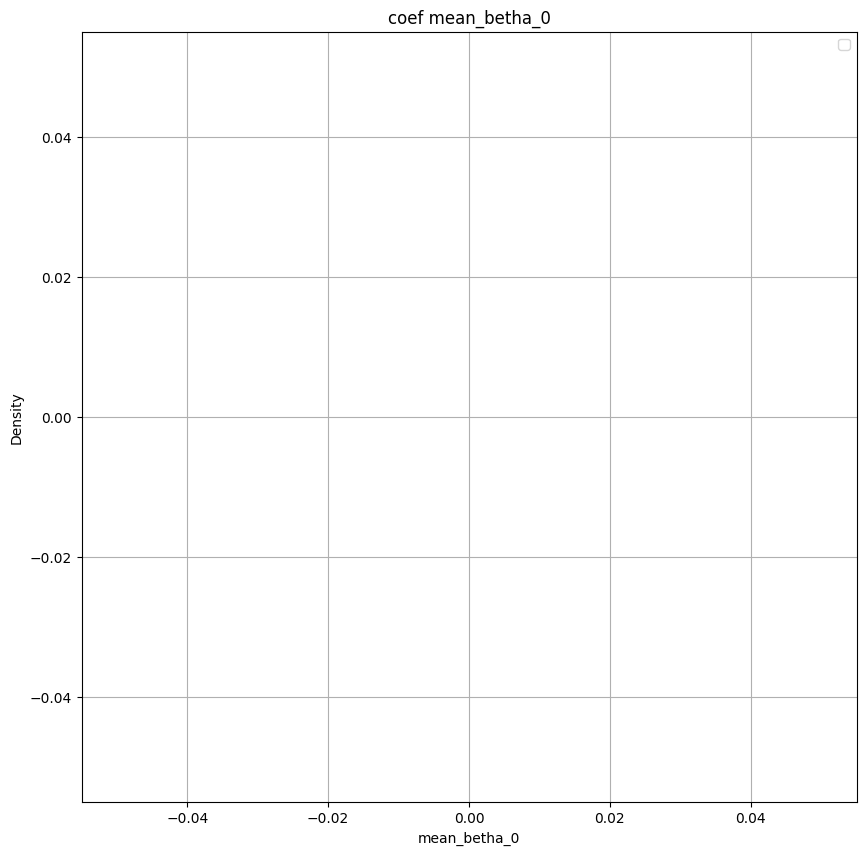

mean fault t :  -1.0676316820909808  - mean fault :  -1.065214537255758  - mean health :  -1.0516196407296552


<ipython-input-11-96ead9510f57>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
<ipython-input-11-96ead9510f57>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault_alpha '  , shade=True  )
<ipython-input-11-96ead9510f57>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_health_mean_and_std[element] , label=f'mean_helth - {element} ' ,  shade=True  )
<ipython-input-11-96ead9510f57>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This 

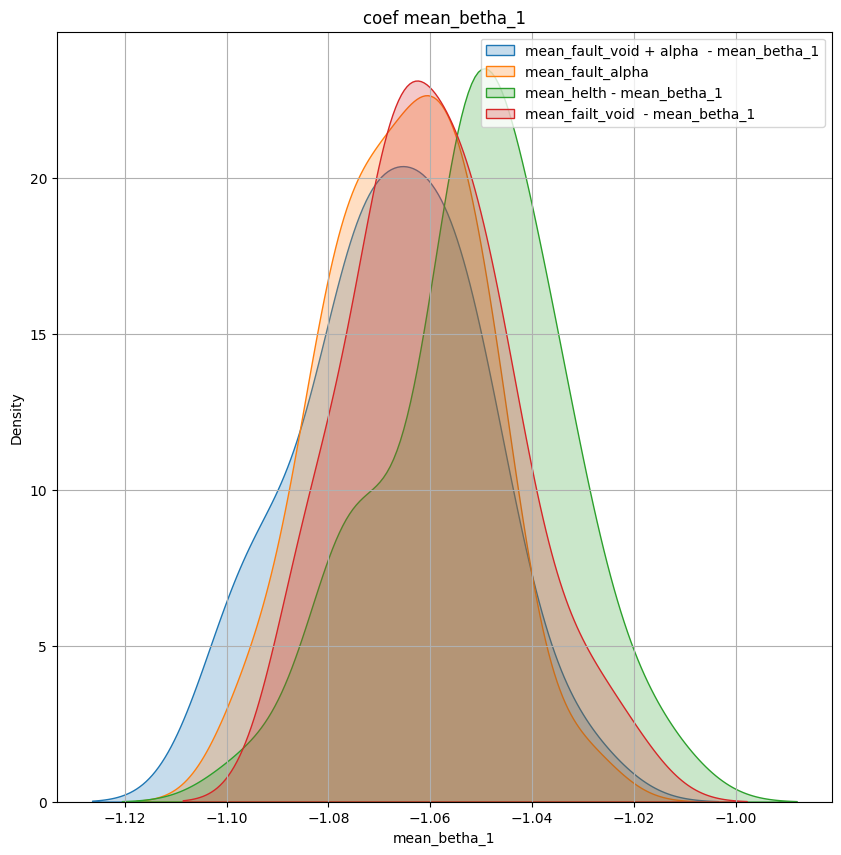

mean fault t :  -0.07130737898628046  - mean fault :  -0.07454167776044815  - mean health :  -0.07273093962677951


<ipython-input-11-96ead9510f57>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
<ipython-input-11-96ead9510f57>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault_alpha '  , shade=True  )
<ipython-input-11-96ead9510f57>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_health_mean_and_std[element] , label=f'mean_helth - {element} ' ,  shade=True  )
<ipython-input-11-96ead9510f57>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This 

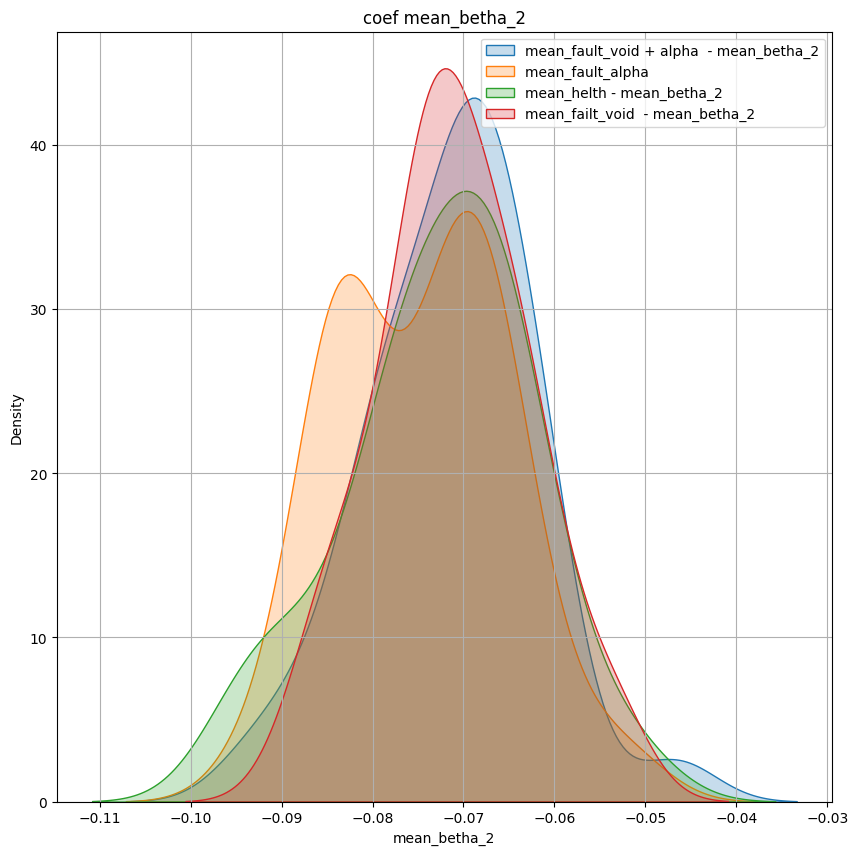

mean fault t :  2.8140966151428386  - mean fault :  2.8126840684110537  - mean health :  2.787872464115682


<ipython-input-11-96ead9510f57>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
<ipython-input-11-96ead9510f57>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault_alpha '  , shade=True  )
<ipython-input-11-96ead9510f57>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_health_mean_and_std[element] , label=f'mean_helth - {element} ' ,  shade=True  )
<ipython-input-11-96ead9510f57>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This 

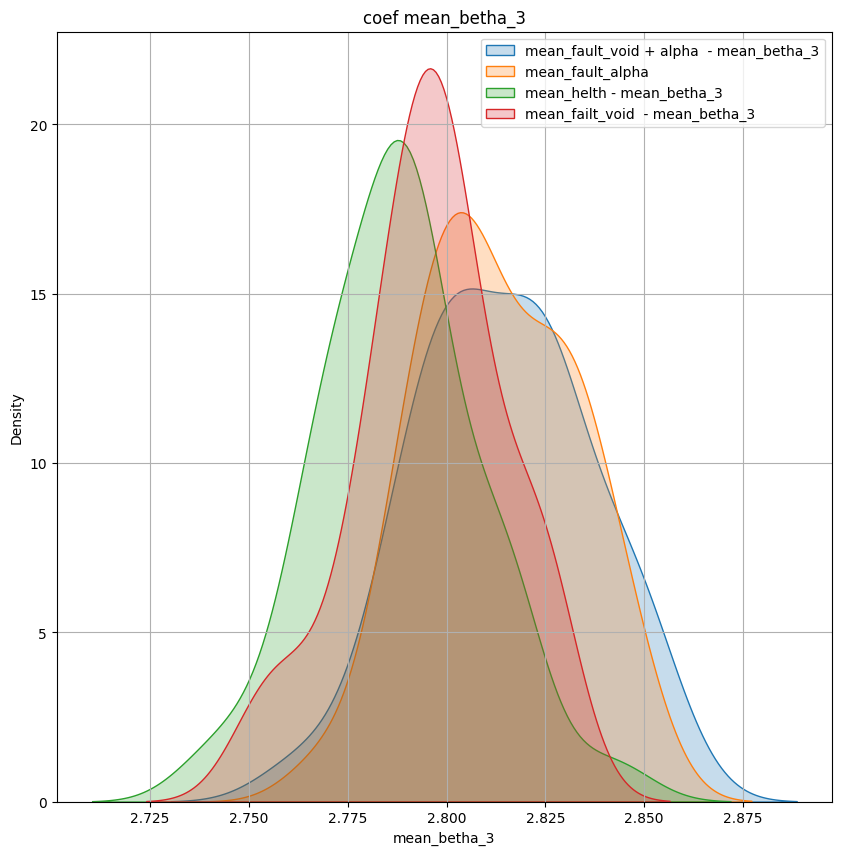

mean fault t :  0.08543560109857834  - mean fault :  0.08816849310423641  - mean health :  0.08773368963206833


<ipython-input-11-96ead9510f57>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
<ipython-input-11-96ead9510f57>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault_alpha '  , shade=True  )
<ipython-input-11-96ead9510f57>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_health_mean_and_std[element] , label=f'mean_helth - {element} ' ,  shade=True  )
<ipython-input-11-96ead9510f57>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This 

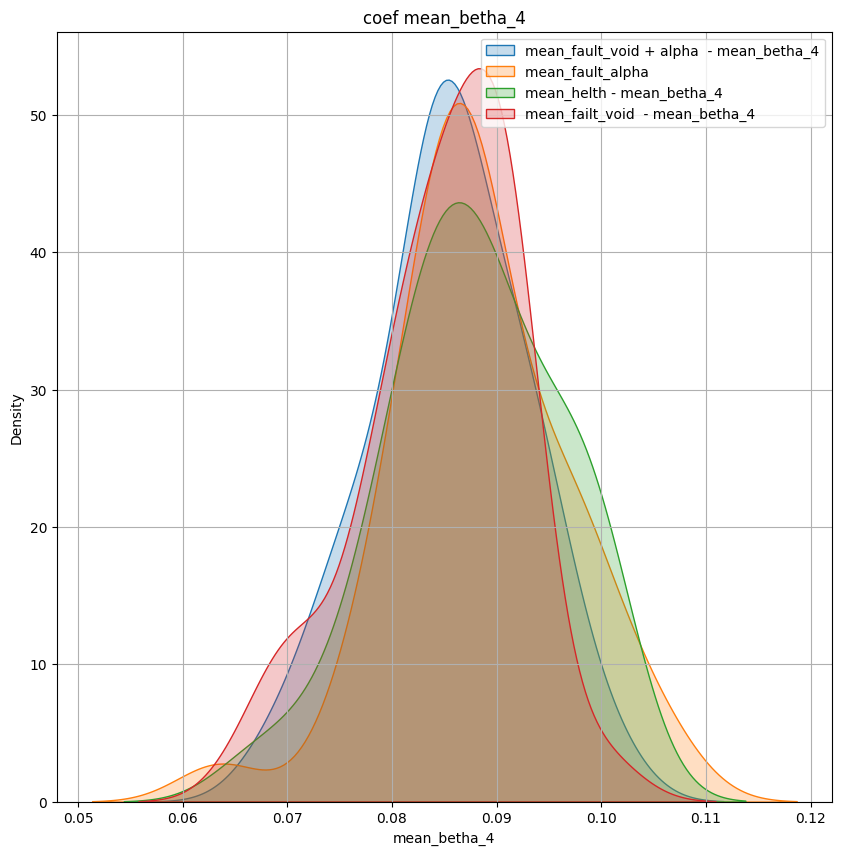

mean fault t :  -0.014830676245942316  - mean fault :  -0.01634570437809203  - mean health :  -0.014941930279320207


<ipython-input-11-96ead9510f57>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
<ipython-input-11-96ead9510f57>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault_alpha '  , shade=True  )
<ipython-input-11-96ead9510f57>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_health_mean_and_std[element] , label=f'mean_helth - {element} ' ,  shade=True  )
<ipython-input-11-96ead9510f57>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This 

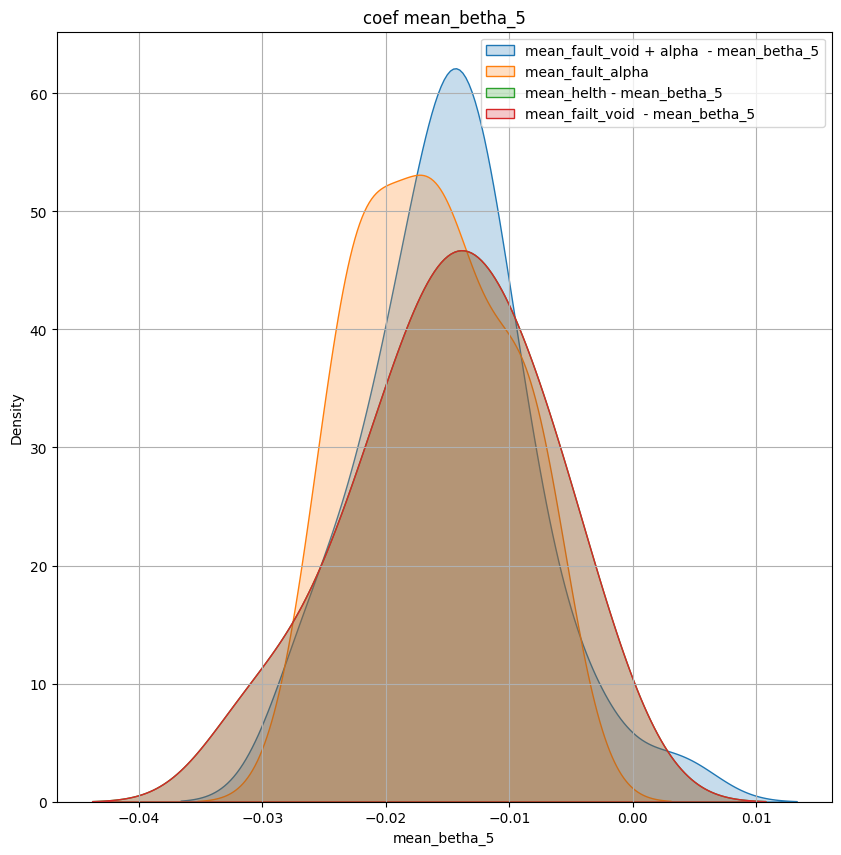

In [11]:
for element in check_columns :
  fig = plt.figure(figsize = (10 , 10 ))
  ax0 = fig.add_subplot(111 )
  print("mean fault t : " , df_fault_t_mean_and_std[element].mean() , " - mean fault : " , df_fault_mean_and_std[element].mean() , " - mean health : " , df_health_mean_and_std[element].mean() )
  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault_alpha '  , shade=True  )
  sns.kdeplot(df_health_mean_and_std[element] , label=f'mean_helth - {element} ' ,  shade=True  )
  sns.kdeplot(df_health_t_mean_and_std[element] , label=f'mean_failt_void  - {element} ' ,  shade=True  )
  plt.legend()
  plt.title(f"coef {element}")
  plt.grid()
  plt.show()

In [12]:
df_result = pd.DataFrame(total_simulation)


In [44]:
df_result.columns

Index(['bias_correlation', 'betha_0_correlation', 'betha_1_correlation',
       'betha_2_correlation', 'betha_3_correlation', 'betha_4_correlation',
       'betha_5_correlation', 'alpha', 'flap', 'accuracy_nav',
       'accuracy_random_forest', 'n_estimators_RF', 'max_features_RF',
       'max_depth_RF', 'criterion_RF', 'accuracy_extra_classifier',
       'accuracy_svc_', 'C_svc', 'kernel_svc', 'gamma_svc', 'ann'],
      dtype='object')

In [13]:
df_result.head(5)

,bias_correlation,betha_0_correlation,betha_1_correlation,betha_2_correlation,betha_3_correlation,betha_4_correlation,betha_5_correlation,alpha,flap,accuracy_nav,...,n_estimators_RF,max_features_RF,max_depth_RF,criterion_RF,accuracy_extra_classifier,accuracy_svc_,C_svc,kernel_svc,gamma_svc,ann
0,0.007115,NaN,-0.001560,-0.027838,0.008445,-0.000331,-0.050312,0.001,1,0.217172,...,200,sqrt,7,gini,0.303030,0.292929,100,rbf,0.1,0.292929
1,0.011908,NaN,-0.063130,0.004665,0.074168,-0.012625,-0.013266,0.001,2,0.202020,...,200,sqrt,6,gini,0.257576,0.262626,100,rbf,0.1,0.222222
2,-0.001903,NaN,0.111843,0.081080,-0.116957,-0.043259,0.086272,0.001,3,0.191919,...,500,sqrt,4,gini,0.171717,0.227273,1000,rbf,0.1,0.247475
3,0.010665,NaN,-0.047247,-0.006350,0.062016,0.023407,0.007212,0.001,4,0.217172,...,200,sqrt,4,gini,0.257576,0.196970,1,linear,1.0,0.207071
4,0.012002,NaN,0.020867,-0.013689,-0.008903,-0.009562,-0.039834,0.002,1,0.237374,...,200,sqrt,7,gini,0.232323,0.308081,100,rbf,0.1,0.257576


In [47]:
df_svc_group = df_result.groupby(['alpha' , 'flap' ]).agg({'accuracy_svc_' : ['max'] , 'accuracy_nav':['max'] , 'accuracy_extra_classifier' : ['max'] , 'ann':['max']})

In [48]:
df_svc_group

accuracy_svc_ accuracy_nav accuracy_extra_classifier       ann
                     max          max                       max       max
alpha flap                                                               
0.001 1         0.292929     0.217172                  0.303030  0.292929
      2         0.262626     0.202020                  0.257576  0.222222
      3         0.227273     0.191919                  0.171717  0.247475
      4         0.196970     0.217172                  0.257576  0.207071
0.002 1         0.308081     0.237374                  0.232323  0.257576
      2         0.257576     0.252525                  0.303030  0.262626
      3         0.333333     0.217172                  0.308081  0.257576
      4         0.272727     0.237374                  0.242424  0.277778
0.003 1         0.292929     0.232323                  0.257576  0.232323
      2         0.242424     0.207071                  0.242424  0.287879
      3         0.262626     0.232323                  0.267677  0.303030
      4         0.217172     0.242424                  0.212121  0.257576
0.004 1         0.262626     0.252525                  0.257576  0.333333
      2         0.287879     0.207071                  0.252525  0.358586
      3         0.308081     0.313131                  0.313131  0.363636
      4         0.252525     0.207071                  0.257576  0.328283
0.005 1         0.297980     0.227273                  0.292929  0.272727
      2         0.277778     0.242424                  0.191919  0.262626
      3         0.277778     0.207071                  0.232323  0.181818
      4         0.272727     0.171717                  0.212121  0.292929
0.006 1         0.308081     0.212121                  0.308081  0.272727
      2         0.257576     0.186869                  0.272727  0.232323
      3         0.262626     0.227273                  0.212121  0.308081
      4         0.328283     0.237374                  0.232323  0.303030
0.007 1         0.313131     0.232323                  0.232323  0.252525
      2         0.202020     0.252525                  0.272727  0.247475
      3         0.308081     0.222222                  0.252525  0.272727
      4         0.176768     0.257576                  0.227273  0.252525
0.008 1         0.343434     0.247475                  0.237374  0.348485
      2         0.262626     0.222222                  0.257576  0.313131
      3         0.287879     0.161616                  0.202020  0.262626
      4         0.338384     0.191919                  0.333333  0.252525
0.009 1         0.353535     0.222222                  0.297980  0.328283
      2         0.272727     0.227273                  0.232323  0.282828
      3         0.272727     0.292929                  0.272727  0.338384
      4         0.318182     0.227273                  0.282828  0.348485

In [16]:
df_svc_group.plot(x = 'alpha' , y = 'accuracy_svc_mean')

KeyError: 'alpha'

IndexError: single positional indexer is out-of-bounds

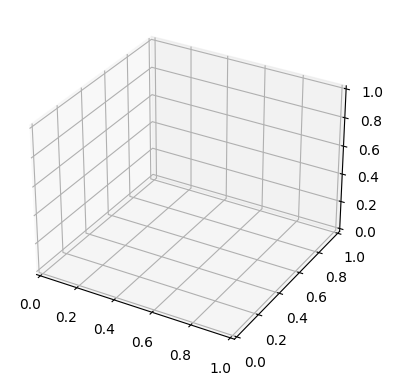

In [17]:
fig = plt.figure(figsize = (10 , 10 ))
ax0 = fig.add_subplot( 1 , 2 , 1 , projection = "3d" )
ax0.scatter3D(df_svc_group.iloc[: , 0 ] , df_svc_group.iloc[: , 1 ] , df_svc_group[: , 3])
plt.legend()
plt.grid()
plt.show()

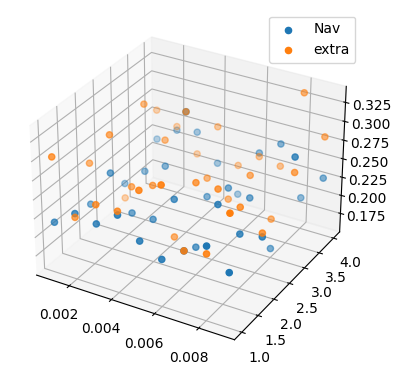

In [18]:
fig = plt.figure(figsize = (10 , 10 ))
ax0 = fig.add_subplot( 1 , 2 , 1 , projection = "3d" )
ax0.scatter3D(df_result.iloc[ : , 7 ] ,df_result.iloc[ : , 8 ] , df_result.iloc[ : , 9] , label='Nav')
ax0.scatter3D(df_result.iloc[ : , 7 ] ,df_result.iloc[ : , 8 ] , df_result.iloc[ : , 15] , label='extra')
plt.legend()
plt.grid()
plt.show()

In [23]:
df_result.head()

,bias_correlation,betha_0_correlation,betha_1_correlation,betha_2_correlation,betha_3_correlation,betha_4_correlation,betha_5_correlation,alpha,flap,accuracy_nav,...,n_estimators_RF,max_features_RF,max_depth_RF,criterion_RF,accuracy_extra_classifier,accuracy_svc_,C_svc,kernel_svc,gamma_svc,ann
0,0.007115,NaN,-0.001560,-0.027838,0.008445,-0.000331,-0.050312,0.001,1,0.217172,...,200,sqrt,7,gini,0.303030,0.292929,100,rbf,0.1,0.292929
1,0.011908,NaN,-0.063130,0.004665,0.074168,-0.012625,-0.013266,0.001,2,0.202020,...,200,sqrt,6,gini,0.257576,0.262626,100,rbf,0.1,0.222222
2,-0.001903,NaN,0.111843,0.081080,-0.116957,-0.043259,0.086272,0.001,3,0.191919,...,500,sqrt,4,gini,0.171717,0.227273,1000,rbf,0.1,0.247475
3,0.010665,NaN,-0.047247,-0.006350,0.062016,0.023407,0.007212,0.001,4,0.217172,...,200,sqrt,4,gini,0.257576,0.196970,1,linear,1.0,0.207071
4,0.012002,NaN,0.020867,-0.013689,-0.008903,-0.009562,-0.039834,0.002,1,0.237374,...,200,sqrt,7,gini,0.232323,0.308081,100,rbf,0.1,0.257576


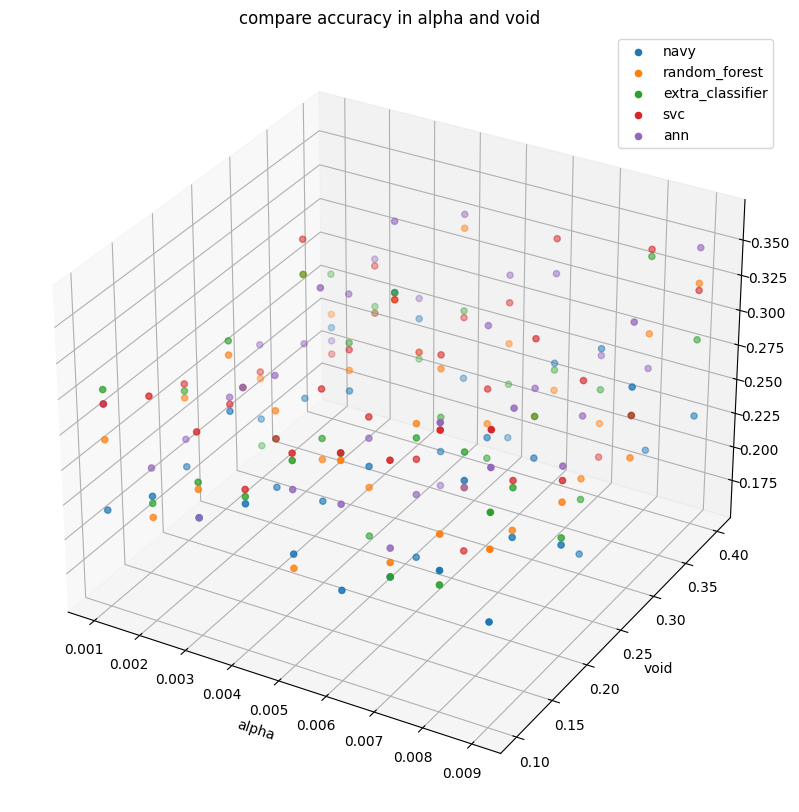

In [35]:
fig = plt.figure(figsize = (10 , 10 ))
ax0 = fig.add_subplot( projection='3d' )
ax0.scatter3D( df_result.iloc[ : , 7 ] , df_result.iloc[ : , 8 ]/10 , df_result.iloc[ : , 9 ] , label = 'navy')
ax0.scatter3D( df_result.iloc[ : , 7 ] , df_result.iloc[ : , 8 ]/10 , df_result.iloc[ : , 10] , label = 'random_forest')
ax0.scatter3D( df_result.iloc[ : , 7 ] , df_result.iloc[ : , 8 ]/10 , df_result.iloc[ : , 15] , label = 'extra_classifier')
ax0.scatter3D( df_result.iloc[ : , 7 ] , df_result.iloc[ : , 8 ]/10 , df_result.iloc[ : , 16] , label = 'svc')
ax0.scatter3D( df_result.iloc[ : , 7 ] , df_result.iloc[ : , 8 ]/10 , df_result.iloc[: , -1 ] , label = 'ann')
plt.title("compare accuracy in alpha and void  ")
plt.xlabel("alpha")
plt.ylabel("void")
plt.legend()
plt.grid()
plt.show()

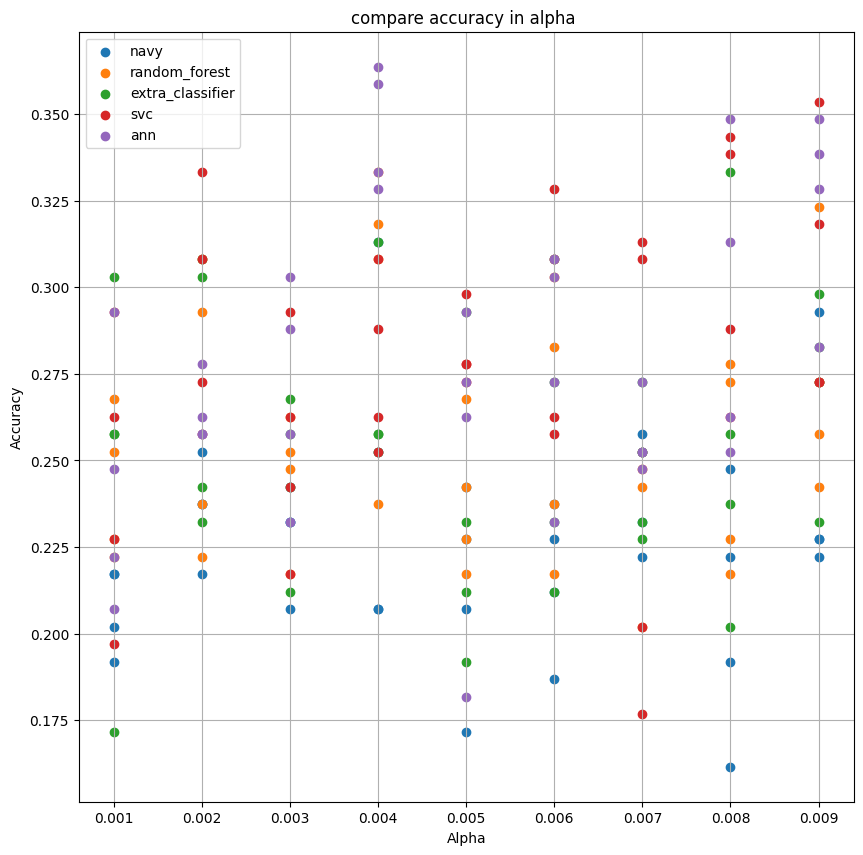

In [36]:
fig = plt.figure(figsize = (10 , 10 ))
ax0 = fig.add_subplot( )
ax0.scatter( df_result.iloc[ : , 7 ] ,  df_result.iloc[ : , 9 ] , label = 'navy')
ax0.scatter( df_result.iloc[ : , 7 ] ,  df_result.iloc[ : , 10] , label = 'random_forest')
ax0.scatter( df_result.iloc[ : , 7 ] ,  df_result.iloc[ : , 15] , label = 'extra_classifier')
ax0.scatter( df_result.iloc[ : , 7 ] ,  df_result.iloc[ : , 16] , label = 'svc')
ax0.scatter( df_result.iloc[ : , 7 ] ,  df_result.iloc[: , -1 ] , label = 'ann')
plt.title("compare accuracy in alpha ")
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

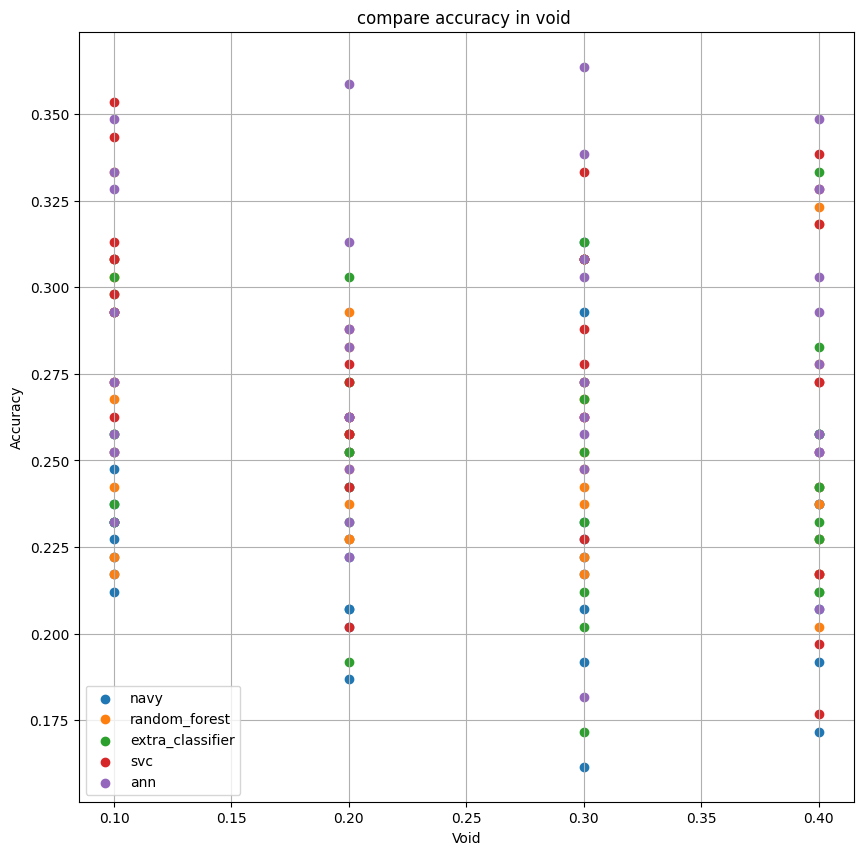

In [37]:
fig = plt.figure(figsize = (10 , 10 ))
ax0 = fig.add_subplot( )
ax0.scatter( df_result.iloc[ : , 8 ]/10 ,  df_result.iloc[ : , 9 ] , label = 'navy')
ax0.scatter( df_result.iloc[ : , 8 ]/10 ,  df_result.iloc[ : , 10] , label = 'random_forest')
ax0.scatter( df_result.iloc[ : , 8 ]/10 ,  df_result.iloc[ : , 15] , label = 'extra_classifier')
ax0.scatter( df_result.iloc[ : , 8 ]/10 ,  df_result.iloc[ : , 16] , label = 'svc')
ax0.scatter( df_result.iloc[ : , 8 ]/10 ,  df_result.iloc[: , -1 ] , label = 'ann')
plt.title("compare accuracy in void ")
plt.ylabel("Accuracy")
plt.xlabel("Void")
plt.legend()
plt.grid()
plt.show()

In [ ]:
df_result.groupby("alpha" , "flap").agg({'navy':[]})

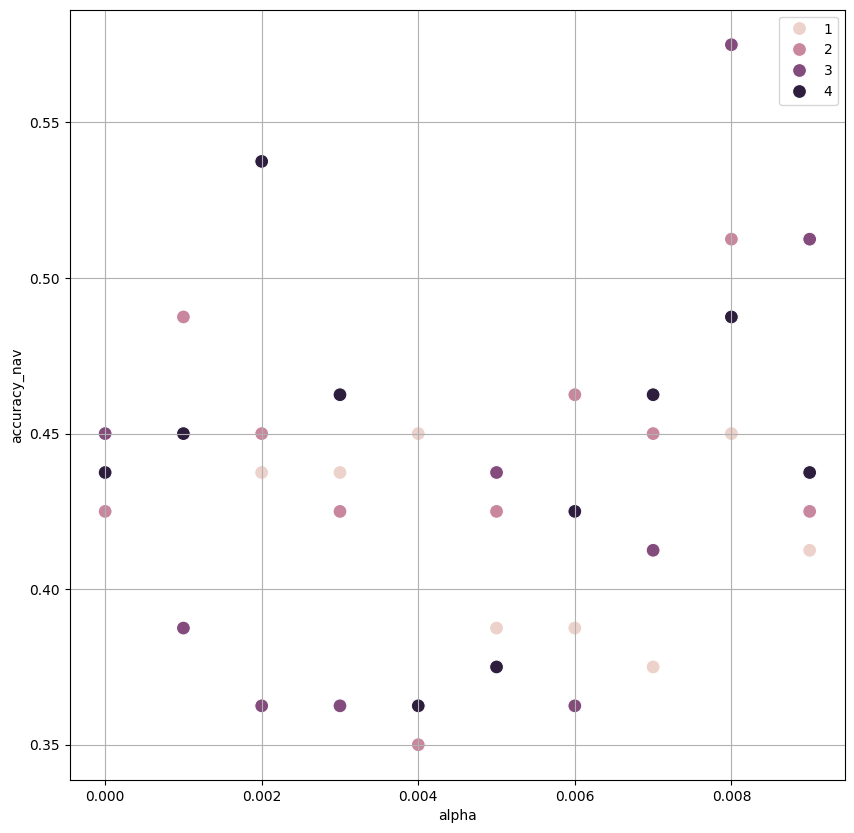

In [ ]:
plt.figure(figsize = (10 , 10 ))
sns.scatterplot(data=df_result, x="alpha", y="accuracy_nav", hue="flap" , s = 100  )
plt.legend()
plt.grid()
plt.show()

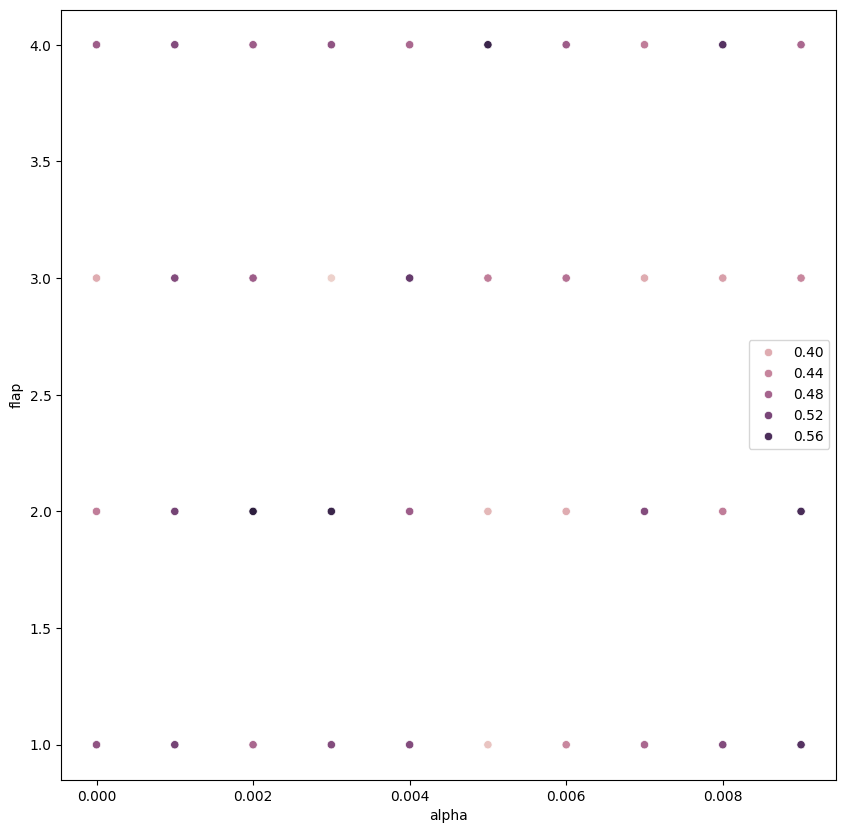

In [ ]:
plt.figure(figsize=(10 , 10 ))
sns.scatterplot(data=df_result, x="alpha", y="flap", hue="accuracy_svc_", hue_order = ["linear" , "rbf" ] )
plt.legend()
plt.show()

In [ ]:
df_result['flap'].unique()

array([1, 2, 3, 4])

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

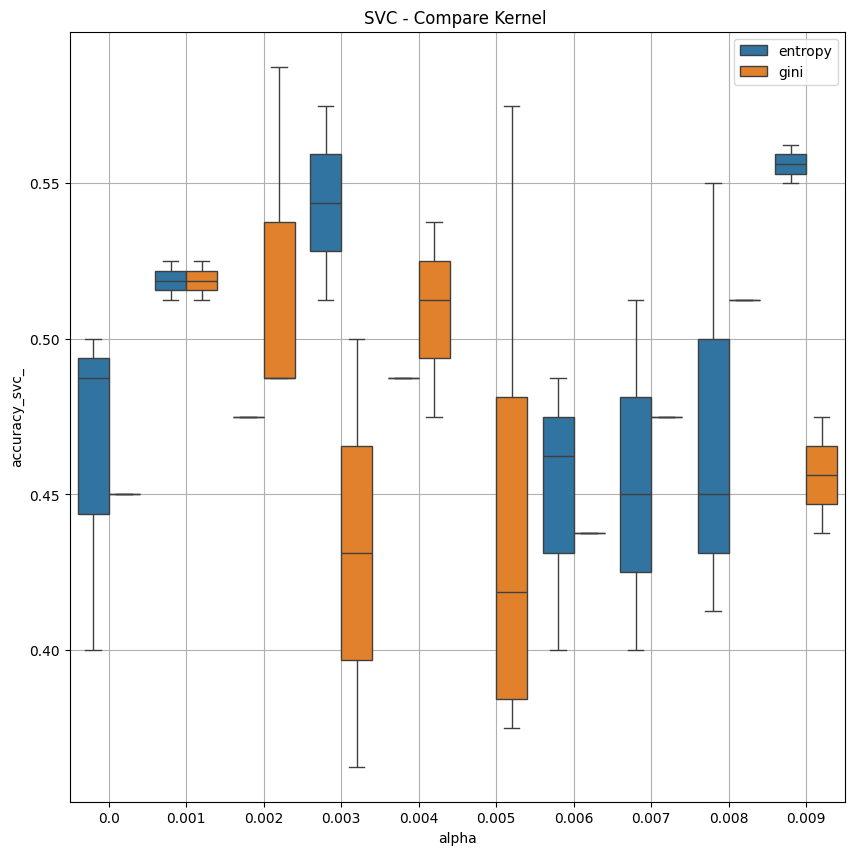

In [ ]:
plt.figure(figsize = (10 , 10 )  )
sns.boxplot(x="alpha", y="accuracy_svc_" , hue='criterion_RF', data = df_result )
plt.title("SVC - Compare Kernel " )
plt.legend()
plt.grid()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

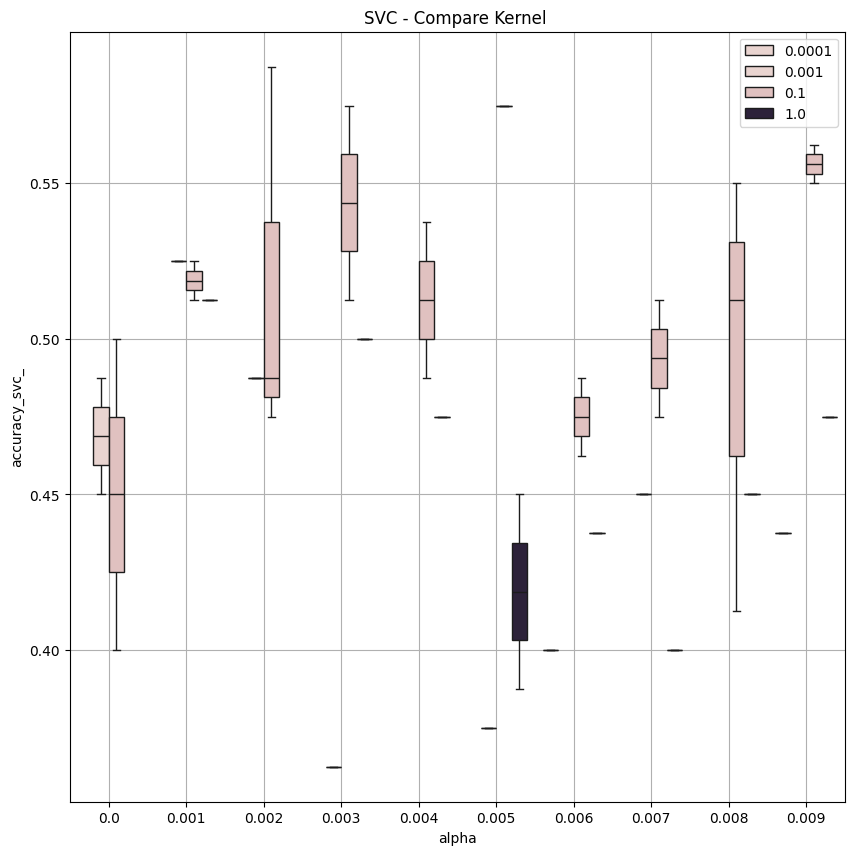

In [ ]:
plt.figure(figsize = (10 , 10 )  )
sns.boxplot(x="alpha", y="accuracy_svc_" , hue='gamma_svc', data = df_result )
plt.title("SVC - Compare Kernel " )
plt.legend()
plt.grid()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

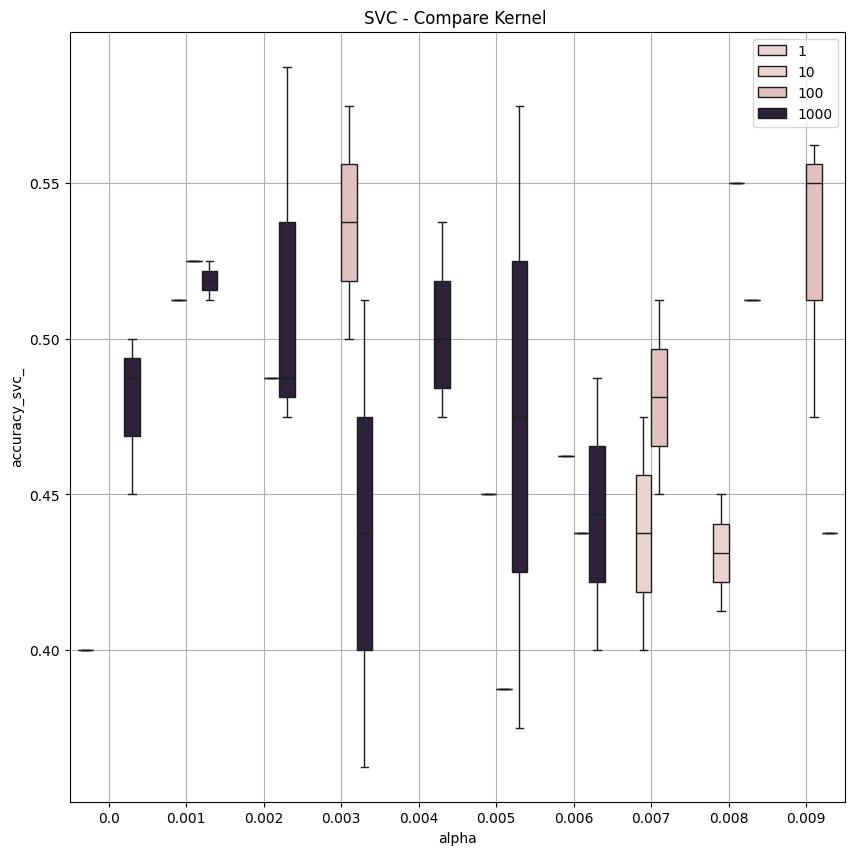

In [ ]:
plt.figure(figsize = (10 , 10 )  )
sns.boxplot(x="alpha", y="accuracy_svc_" , hue='C_svc', data = df_result )
plt.title("SVC - Compare Kernel " )
plt.legend()
plt.grid()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


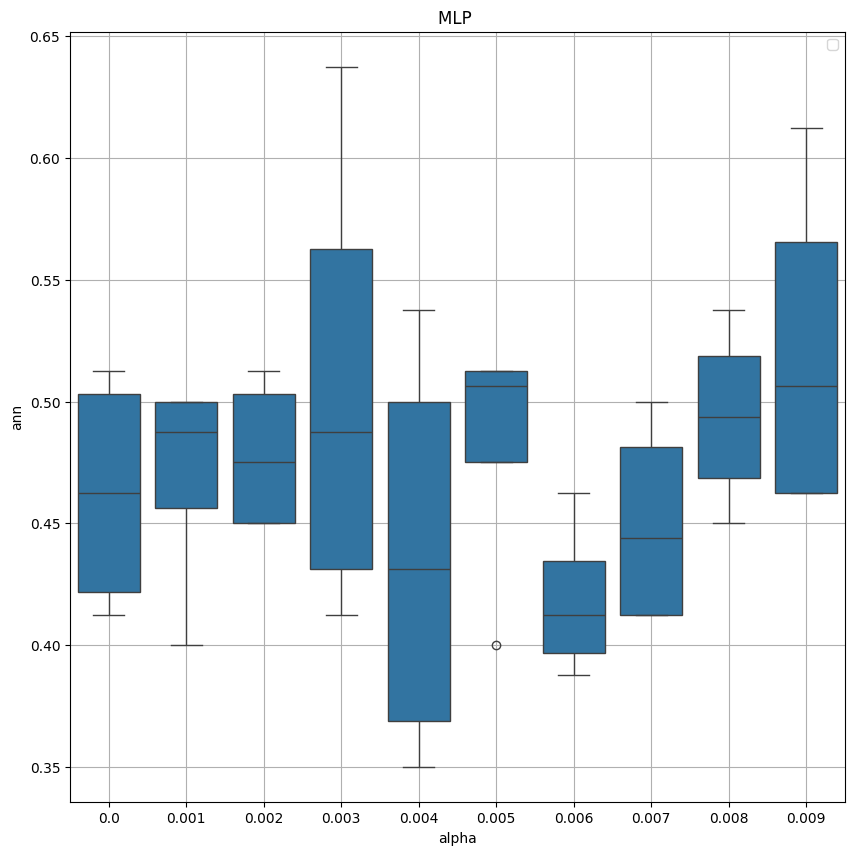

In [ ]:
plt.figure(figsize = (10 , 10 )  )
sns.boxplot(x="alpha", y="ann" , data = df_result )
plt.title("MLP " )
plt.legend()
plt.grid()
plt.show()
accuracy_nav

In [ ]:
plt.figure(figsize = (10 , 10 )  )
sns.boxplot(x="alpha", y="accuracy_nav" , hue="flap" , data = df_result )
plt.title("MLP " )
plt.legend()
plt.grid()
plt.show()
